In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,GaussianNoise
from tensorflow.keras.models import Sequential, save_model, load_model
data=[]
labels=[]
classes=38
datadir="D:/train"
categories=["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy","Blueberry___healthy","Cherry_(including_sour)___healthy","Cherry_(including_sour)___Powdery_mildew","Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot","Corn_(maize)___Common_rust_","Corn_(maize)___healthy","Corn_(maize)___Northern_Leaf_Blight","Grape___Black_rot","Grape___Esca_(Black_Measles)","Grape___healthy","Grape___Leaf_blight_(Isariopsis_Leaf_Spot)","Orange___Haunglongbing_(Citrus_greening)","Peach___Bacterial_spot","Peach___healthy","Pepper,_bell___Bacterial_spot","Pepper,_bell___healthy","Potato___Early_blight","Potato___healthy","Potato___Late_blight","Raspberry___healthy","Soybean___healthy","Squash___Powdery_mildew","Strawberry___healthy","Strawberry___Leaf_scorch","Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]
for i in range(classes):
    path=os.path.join(datadir,categories[i-1])
    for a in os.listdir(path):
        image=Image.open(path+'\\'+a)
        image=image.resize((30,30))
        image=np.array(image)
        data.append(image)
        #print(len(data))
        #print(data)
        labels.append(i)
        #plt.imshow(image)
        #plt.show()
data=np.array(data)
labels=np.array(labels)

print(data.shape,labels.shape)
      
        
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
y_train=to_categorical(y_train,38)
y_test=to_categorical(y_test,38)

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(30,30,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))



model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(rate=0.5))
model.add(Dense(38,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
epochs=30
history=model.fit(X_train,y_train,batch_size=64,epochs=epochs,validation_data=(X_test,y_test))
model.save("my_model2.h5")

(87867, 30, 30, 3) (87867,)
(70293, 30, 30, 3) (17574, 30, 30, 3) (70293,) (17574,)
Epoch 1/30
1099/1099 [==============================] - 37s 33ms/step - loss: 2.3699 - accuracy: 0.3580 - val_loss: 1.1761 - val_accuracy: 0.6565
Epoch 2/30
1099/1099 [==============================] - 35s 32ms/step - loss: 1.3567 - accuracy: 0.5914 - val_loss: 0.8466 - val_accuracy: 0.7389
Epoch 3/30
1099/1099 [==============================] - 34s 31ms/step - loss: 1.0615 - accuracy: 0.6758 - val_loss: 0.6830 - val_accuracy: 0.7962
Epoch 4/30
1099/1099 [==============================] - 34s 31ms/step - loss: 0.9134 - accuracy: 0.7204 - val_loss: 0.5667 - val_accuracy: 0.8243
Epoch 5/30
1099/1099 [==============================] - 34s 31ms/step - loss: 0.8183 - accuracy: 0.7462 - val_loss: 0.4999 - val_accuracy: 0.8406
Epoch 6/30
1099/1099 [==============================] - 34s 31ms/step - loss: 0.7505 - accuracy: 0.7670 - val_loss: 0.5409 - val_accuracy: 0.8283
Epoch 7/30
1099/1099 [==================

In [2]:
#loading the model
model1 = keras.models.load_model("my_model2.h5")
#evaluating model
score = model1.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')






550/550 [==============================] - 3s 5ms/step - loss: 0.3307 - accuracy: 0.8964
Test loss: 0.33070123195648193 / Test accuracy: 0.89643794298172


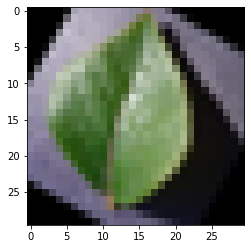

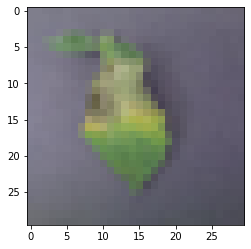

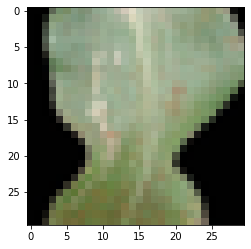

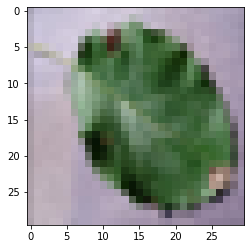

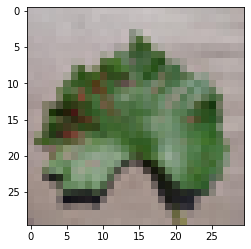

In [3]:
use_samples = [5, 38, 3939,8786,1000] # samples
samples_to_predict = []
# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = X_test[sample]
  plt.imshow(reshaped_image)
  plt.show()
  samples_to_predict.append(X_test[sample])


In [4]:
#converting to numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

#prediction
predictions = model.predict(samples_to_predict)
print(predictions)

#printing class
classes = np.argmax(predictions, axis = 1)
print(classes)

print(categories[classes[0]-1]+" "+","+categories[classes[1]-1]+" "+","+categories[classes[2]-1]+" "+","+categories[classes[3]-1]+" "+","+categories[classes[4]-1])



(5, 30, 30, 3)
[[4.87812843e-21 8.69448483e-03 3.15432553e-05 6.47324239e-09
  1.24512862e-05 9.91240203e-01 6.40263260e-14 7.66434902e-11
  2.31417855e-14 6.86391555e-10 2.84355101e-15 3.59815715e-20
  1.13579879e-16 2.25096753e-14 3.82856086e-16 9.12659759e-27
  1.33976531e-14 1.59386393e-09 1.49574535e-05 5.76821755e-08
  1.91890626e-06 2.16939000e-09 1.26734374e-08 9.83001354e-12
  6.53044513e-14 6.15533708e-16 4.57440857e-19 4.49317753e-07
  3.06593206e-12 1.24682071e-18 2.43483168e-11 2.56746091e-07
  1.65265901e-09 6.28864322e-11 2.32836683e-08 6.43215342e-11
  3.08974359e-06 5.83551355e-07]
 [1.78109324e-15 9.51060827e-11 1.65392199e-23 4.48001282e-13
  5.70290057e-19 6.94656423e-21 6.78016532e-35 4.59962278e-20
  3.44291550e-16 1.69715141e-32 0.00000000e+00 3.09945722e-06
  1.00706346e-34 6.73744643e-34 0.00000000e+00 7.23360726e-33
  2.30084361e-18 9.95019778e-12 3.28500379e-30 4.33301565e-18
  1.64534950e-25 8.23278000e-20 2.07842805e-30 4.98990009e-13
  2.37562483e-36 3.575

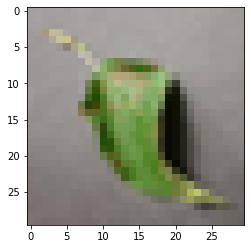

(1, 30, 30, 3)


In [28]:


#testing or prediction leaf diseases
#ij=Image.open(r"C:\Users\DELL\Desktop\test\earlypotato.png","r")
ima=[]

#loading image
ij=Image.open(r"D:\test\AppleCedarRust3.jpg","r")
ij=ij.resize((30,30))

ij=np.array(ij)

#leaf image
plt.imshow(ij)
plt.show()

#appending image
ima.append(ij);
ima=np.array(ima)

#shape of image
print(ima.shape)










In [29]:
pre = model.predict(ima)
print(pre)

#printing class
clas = np.argmax(pre, axis = 1)
print(clas)
print(categories[clas[0]-1])

[[4.4934063e-06 2.8051738e-06 1.9198991e-05 9.8453969e-01 3.2413564e-06
  3.9457842e-05 1.1439241e-07 1.9259957e-04 1.6272725e-09 3.9804680e-11
  2.8171591e-14 2.2803428e-11 1.9299414e-08 6.8459343e-07 7.3998190e-11
  5.0929387e-12 1.3220219e-06 2.5611608e-03 1.5021966e-05 3.9096731e-06
  2.4779793e-05 5.3776354e-12 5.3333736e-07 2.4580821e-08 2.2561201e-07
  2.0639003e-12 1.7661688e-09 5.6697641e-15 2.0987798e-07 1.1928232e-03
  3.0011032e-03 8.8768282e-09 2.1414112e-03 1.5235133e-03 8.8105218e-05
  5.1614235e-04 2.9022543e-04 3.8372083e-03]]
[3]
Apple___Cedar_apple_rust


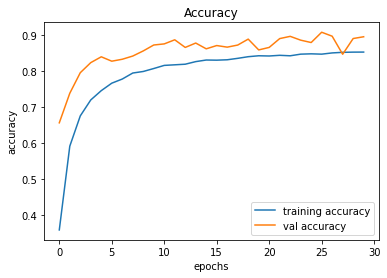

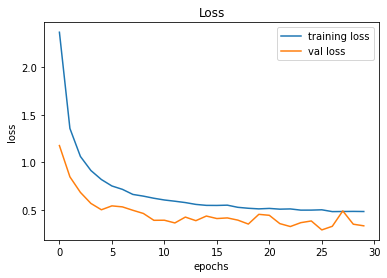

In [7]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)         0